In [5]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.9.1'

In [6]:
IMAGE_SIZE=(256,256)
BATCH_SIZE=32

In [8]:
#Import data into tensorflow data object

image_ds=tf.keras.preprocessing.image_dataset_from_directory("PlantVillage/",seed=123,shuffle=True,image_size=IMAGE_SIZE,batch_size=BATCH_SIZE)

Found 2151 files belonging to 3 classes.


In [10]:
#Extracting class name:

class_names=image_ds.class_names

In [11]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [12]:
for image,labels in image_ds.take(1):
    print(image.shape)
    print(labels.numpy())

(32, 256, 256, 3)
[1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0]


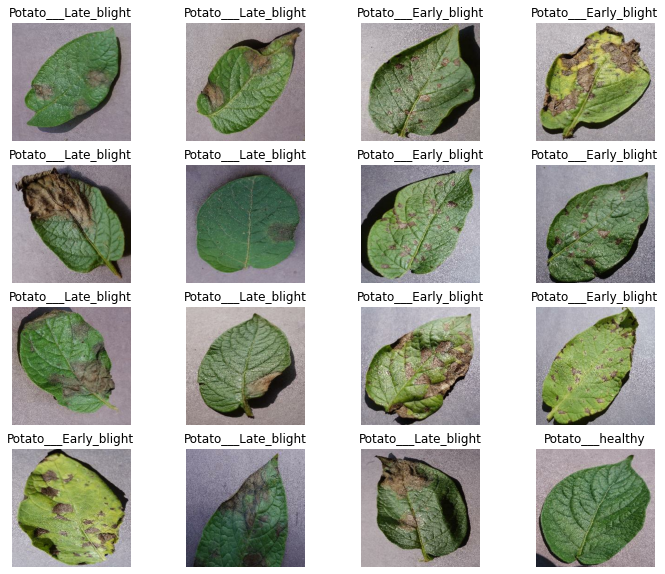

In [17]:
#Visualize some of the images:
plt.figure(figsize=(12,10))
for image,labels in image_ds.take(1):
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis("off")

4.Splitting the dataset:
    
    1.Training set=Dataset to be used for training
    2.Validation set=Dataset to be tested while training
    3.testing set=dataset used to testing after training a model

In [28]:
def get_partition(dataset,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    assert(train_split+test_split+val_split)==1
    
    data_len=len(dataset)
    
    if shuffle:
        dataset=dataset.shuffle(shuffle_size,seed=12)
    
    train_size=int(train_split*data_len)
    val_size=int(val_split*data_len)
    test_size=int(test_split*data_len)
    
    train_ds=dataset.take(train_size)
    val_ds=dataset.skip(train_size).take(val_size)
    test_ds=dataset.skip(train_size).skip(val_size)
    
    return train_ds,test_ds,val_ds

In [43]:
len(image_ds)

68

In [29]:
train_ds, val_ds, test_ds = get_partition(image_ds)

In [30]:
len(train_ds)

54

In [31]:
len(val_ds)

8

In [34]:
len(test_ds)

6

# Cache,shuffle,Prefetch the dataset:

Cache and pre-fetch can be used to store data in memory so after each epoch the input data will not be read again and directly used for training



In [36]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Resizing and Rescaling:

In [38]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1/.255),
])

# Image Augmentation:

In [39]:
augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

# Model Building using CNN:

In [64]:
input_shape=(32,256,256,3)

model=models.Sequential([
    resize_and_rescale,
    augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(3,activation="softmax"),
])

# Compiling the model:



In [68]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [69]:
history = model.fit(
    train_ds,
    batch_size=32,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 122s 2s/step - loss: 4.3254 - accuracy: 0.5272 - val_loss: 0.8016 - val_accuracy: 0.5742
Epoch 2/50
54/54 [==============================] - 107s 2s/step - loss: 0.5580 - accuracy: 0.7512 - val_loss: 0.5126 - val_accuracy: 0.7969
Epoch 3/50
54/54 [==============================] - 113s 2s/step - loss: 0.3969 - accuracy: 0.8461 - val_loss: 0.4881 - val_accuracy: 0.8164
Epoch 4/50
54/54 [==============================] - 110s 2s/step - loss: 0.3285 - accuracy: 0.8681 - val_loss: 0.3590 - val_accuracy: 0.8594
Epoch 5/50
54/54 [==============================] - 108s 2s/step - loss: 0.2682 - accuracy: 0.8924 - val_loss: 0.7692 - val_accuracy: 0.7266
Epoch 6/50
54/54 [==============================] - 107s 2s/step - loss: 0.4101 - accuracy: 0.8351 - val_loss: 0.5157 - val_accuracy: 0.8516
Epoch 7/50
54/54 [==============================] - 104s 2s/step - loss: 0.2591 - accuracy: 0.9005 - val_loss: 0.2818 - val_accuracy: 0.8945
Epoch 8/50
54

In [70]:
scores=model.evaluate(test_ds)

6/6 [==============================] - 14s 657ms/step - loss: 0.0419 - accuracy: 0.9948


In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [72]:
scores

[0.041912127286195755, 0.9947916865348816]

In [73]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [74]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plotting the graph for loss vs val loss

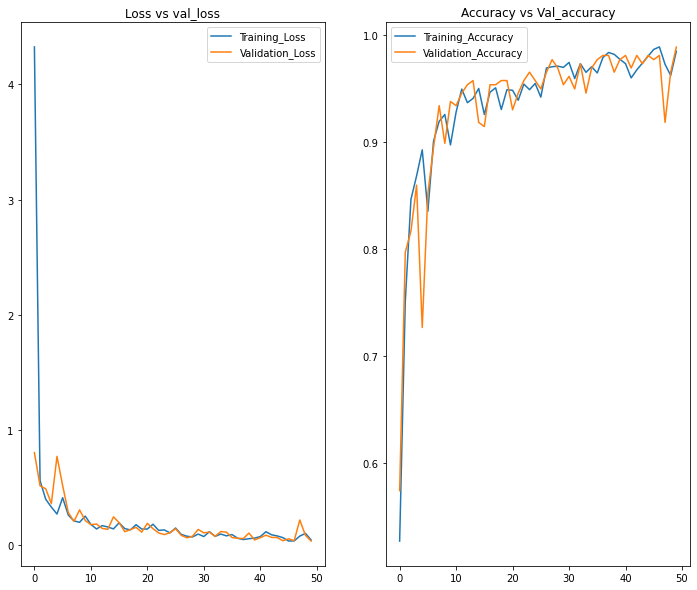

In [83]:
plt.figure(figsize=(12,10))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label="Training_Loss")
plt.plot(history.history['val_loss'],label="Validation_Loss")
plt.legend()
plt.title("Loss vs val_loss")



plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label="Training_Accuracy")
plt.plot(history.history['val_accuracy'],label="Validation_Accuracy")
plt.legend()
plt.title("Accuracy vs Val_accuracy")
plt.show()

# Run perediction on sample images:

In [96]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 47ms/step


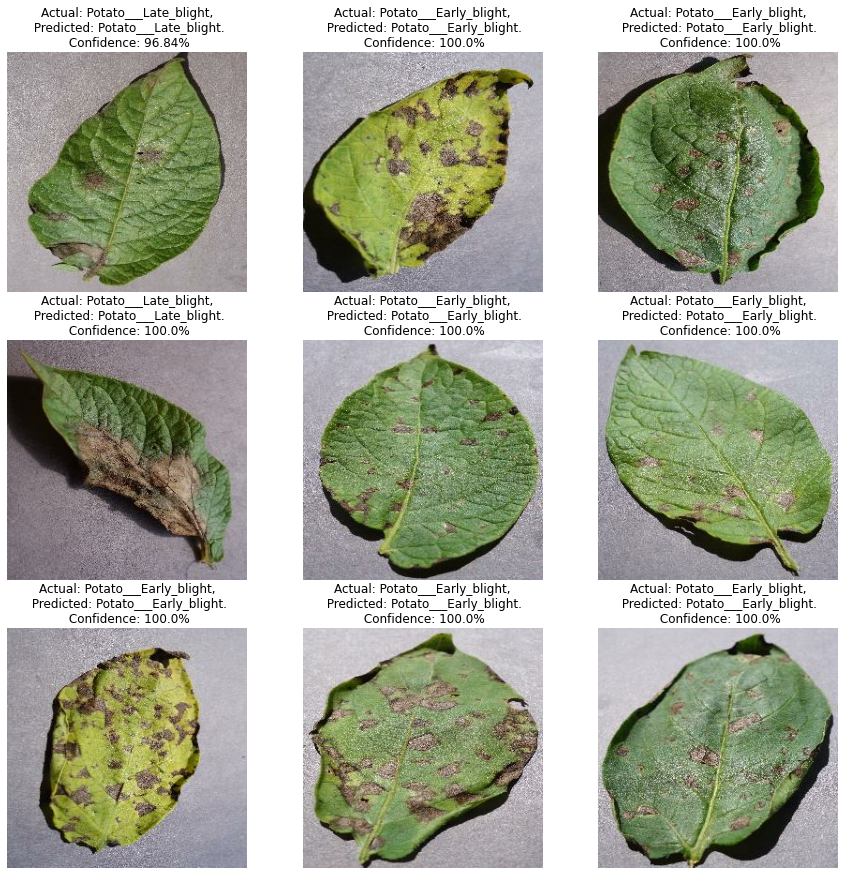

In [97]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [109]:
#Saving the model:

import os
model_version=max([int(i) for i in os.listdir("models")+[0]])+1
model.save(f"../models/{model_version}")

ValueError: invalid literal for int() with base 10: 'potatoDisease.h5'

In [108]:
model.save("models/potatoDisease.h5")